In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from ast import literal_eval
import os
from tqdm import tqdm
import random

random.seed(5749)
plt.rcParams['figure.facecolor'] = 'black'

In [2]:
detexify_data = pd.read_csv('detexify-training-data/detexify.csv')

In [3]:
# for index, row in tqdm(detexify_data.iterrows(),total=detexify_data.shape[0]):
#     image_id = row['id']
#     symbol = row['key']
#     if not os.path.exists('drawings/' + symbol):
#         os.makedirs('drawings/' + symbol)
#     coords = literal_eval(row['strokes'])
#     for elem in coords:
#         x,y,_ = np.array(elem).T
#         plt.axis('off')
#         plt.plot(x, -y, '-', color='white', lw=10)
#         plt.scatter(x, -y, color='white', s=20)
#     plt.savefig('drawings/' + symbol + '/' + str(image_id)+'.png',facecolor='black', edgecolor='none', dpi=50)
#     plt.clf()
    

In [4]:
detexify_data[detexify_data['key']=='latex2e-OT1-_alpha']

,id,key,strokes
88,1301,latex2e-OT1-_alpha,"[[[236.5,117.125,1395175509128],[236.5,118.125..."
184,1433,latex2e-OT1-_alpha,"[[[218,167,1328512930131],[218,167,13285129301..."
272,1554,latex2e-OT1-_alpha,"[[[264,117,1366643893337],[263,119,13666438933..."
310,1604,latex2e-OT1-_alpha,"[[[241,175.883331298828,1377091048999],[241,17..."
314,1608,latex2e-OT1-_alpha,"[[[313,109,1355071802393],[312,109,13550718024..."
...,...,...,...
210160,783,latex2e-OT1-_alpha,"[[[211,236,1310159997723],[210,236,13101599977..."
210250,903,latex2e-OT1-_alpha,"[[[256,64,1360344456166],[255,65,1360344456355..."
210336,1031,latex2e-OT1-_alpha,"[[[256,141,1393948365485],[256,142,13939483654..."
210375,1074,latex2e-OT1-_alpha,"[[[217,134.133331298828,1301352658162],[217,13..."


236.5 125.5
219.125 117.125


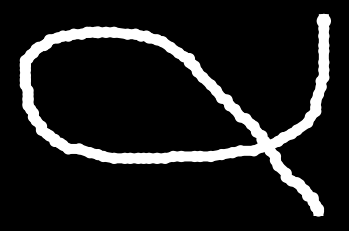

In [5]:
row=detexify_data.iloc[88]
coords = literal_eval(row['strokes'])

plt.axis('off')
for elem in coords:
    x,y,t = np.array(elem).T
    lwidths = [4.5]+[4.5+(((t[x+1]-t[x])*(0.045)) )for x in range(len(t)-1)]
#     print(lwidths)
    print(max(x), min(x))
    print(max(y), min(y))
    
    plt.plot(x, -y, '-', color='white', lw=10)
    plt.scatter(x, -y, color='white', linewidths=lwidths)

plt.savefig('fig2.png',facecolor='black', edgecolor='none', dpi=50,bbox_inches='tight')

[4.5]
[4.5]
[4.5]


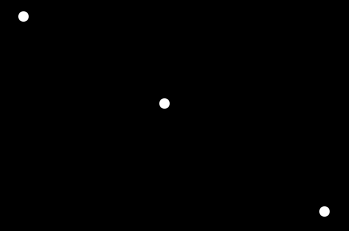

In [6]:
row=detexify_data.iloc[526]
coords = literal_eval(row['strokes'])
for elem in coords:
    x,y,t = np.array(elem).T
    lwidths = [4.5] + [(1.5 + t[x+1]-t[x]) for x in range(len(t)-1)]
    print(lwidths)
    plt.axis('off')
    plt.plot(x, -y, '-', color='white', lw=10)
    plt.scatter(x, -y, color='white', linewidth=lwidths)

plt.savefig('fig3.png',facecolor='black', edgecolor='none', dpi=50)

In [7]:
detexify_data.head()

,id,key,strokes
0,1185,latexsym-OT1-_leadsto,"[[[56.5,222.850006103516,1322586269298],[56.5,..."
1,1186,latex2e-OT1-_pi,"[[[149,123,1375760600585],[149,124,13757606006..."
2,1187,latex2e-OT1-_nabla,"[[[117.5,111.125,1385822387239],[117.5,111.125..."
3,1188,amsmath-OT1-_dotsc,"[[[140,201.633331298828,1321000938785]],[[167,..."
4,1189,marvosym-OT1-_MVAt,"[[[229,188,1321001963389],[229,187,13210019634..."


In [9]:
import re
import requests
import base64
from bs4 import BeautifulSoup

In [12]:
site = 'http://detexify.kirelabs.org/symbols.html'

response = requests.get(site)

soup = BeautifulSoup(response.text, 'html.parser')
img_tags = soup.find_all('img')

urls = [img['src'] for img in img_tags]


# for url in urls:
#     filename = re.search(r'/([\w_-]+[.](jpg|gif|png))$', url)
#     if not filename:
#          print("Regex didn't match with the url: {}".format(url))
#          continue
#     with open(filename.group(1), 'wb') as f:
#         if 'http' not in url:
#             # sometimes an image source can be relative 
#             # if it is provide the base url which also happens 
#             # to be the site variable atm. 
#             url = '{}{}'.format(site, url)
#         response = requests.get(url)
#         f.write(response.content)

In [17]:
from selenium import webdriver
driver = webdriver.PhantomJS()
driver.get(site)

/Users/venkat/opt/miniconda3/envs/detex/lib/python3.7/site-packages/selenium/webdriver/phantomjs/webdriver.py:49: UserWarning: Selenium support for PhantomJS has been deprecated, please use headless versions of Chrome or Firefox instead
  warnings.warn('Selenium support for PhantomJS has been deprecated, please use headless '


ProtocolError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))